# Linear Regression (Basit Doğrusal Regresyon Modeli) 

#### Sales Prediction with Linear Regression

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

pd.set_option('display.float_format', lambda x : '%.2f' % x) 

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn.model_selection import train_test_split, cross_val_score

#### Simple Linear Regression with OLS Using Scikit - Learn

In [4]:
df = pd.read_csv("C:/Users/tolga/OneDrive/Masaüstü/MIUUL ML/machine_learning/datasets/advertising.csv")

In [7]:
df.head()

,TV,radio,newspaper,sales
0,230.10,37.80,69.20,22.10
1,44.50,39.30,45.10,10.40
2,17.20,45.90,69.30,9.30
3,151.50,41.30,58.50,18.50
4,180.80,10.80,58.40,12.90


kaç gözlem var ?

In [8]:
df.shape

(200, 4)

Sadece TV satışlarını istersek

In [9]:
X = df[["TV"]] 
y = df[["sales"]]

In [10]:
X

,TV
0,230.10
1,44.50
2,17.20
3,151.50
4,180.80
...,...
195,38.20
196,94.20
197,177.00
198,283.60


In [11]:
y

,sales
0,22.10
1,10.40
2,9.30
3,18.50
4,12.90
...,...
195,7.60
196,9.70
197,12.80
198,25.50


ilişkiyi önce modelleyeceğiz , sonra grafik yardımıyla değerlendireceğiz 

#### Model

In [12]:
# linear regression 
reg_model = LinearRegression().fit(X,y)

In [13]:
# y_hat = b + w*TV->x

# sabit (b - bias) -> ilgili sabit gelsin [0]
reg_model.intercept_[0]

7.032593549127693

In [14]:
# tv'nin katsayısı(w1) 

reg_model.coef_[0][0]

0.047536640433019764

In [15]:
reg_model.coef_[0]

array([0.04753664])

#### Tahmin

In [16]:
# soru = 150 birimlik tv harcaması olsa ne kadar artış olması beklenir ? 


reg_model.intercept_[0] + reg_model.coef_[0][0] * 150

14.163089614080658

In [17]:
# soru = 500 birimlik tv harcaması olsa ne kadar artış olması beklenir ? 

reg_model.intercept_[0] + reg_model.coef_[0][0] * 500

30.800913765637574

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.00,147.04,85.85,0.70,74.38,149.75,218.82,296.40
radio,200.00,23.26,14.85,0.00,9.97,22.90,36.52,49.60
newspaper,200.00,30.55,21.78,0.30,12.75,25.75,45.10,114.00
sales,200.00,14.02,5.22,1.60,10.38,12.90,17.40,27.00


Not : veri setinde olmayan değere bile 100-150 gibi sayılar yazarak neler olabileceklerini tahminleyebiliriz. 

#### Modelin Görselleştirilmesi 

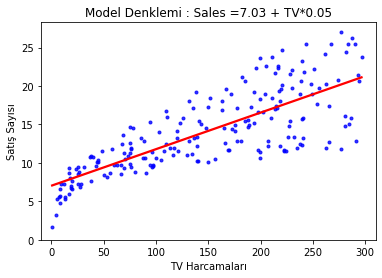

In [19]:
 # regresyon modeli için -> regplot
# x : bağımsız değişken y : bağımlı değişken 
# scatter_kws = gerçek görsele ilişkin => color : b -> blue   
# r -> regrseyonun rengi
# set_title -> grafiğe başlık ekler ve dinamik bir biçimlendirme yapılmıştır  
# round kısmı [0],[2] virgülden sonra 2 basamak al diyerek yuvarlama yapar 
# regresyondan [0][0], 2 0.katsayıyı al ve yuvarla virgülden sonra 2 basamak  
# g.set_xlabel : x eksenine tv harcamaları, g.set_ylabel : satış sayıları 
# plt.xlim : -10 dan 310 a kadar x eksenini görselleştir 
# plt.ylim(bottom 0 ) : 0 dan başla ve görselleştir 


g = sns.regplot(x=X, y=y, scatter_kws={'color':'b','s':9}, ci = False, color="r") 

g.set_title(f"Model Denklemi : Sales ={round(reg_model.intercept_[0],2)} + TV*{round(reg_model.coef_[0][0],2)}") 
g.set_ylabel("Satış Sayısı") 
g.set_xlabel("TV Harcamaları") 
plt.xlim(-10,310) 
plt.ylim(bottom = 0) 
plt.show()
                                       
                                       

#### Doğrusal Regresyonda Tahmin Başarısı 

Amacım en düşük değere gitmesi , en doğru değere gitmesidir, fakat şöyle bir nokta var illa en küçüğü mü seçecez , değişiklik yaptıktan sonraki oranı bizim için önemlidir 

MSE

In [20]:
# mean squared error bana gerçek değerleri ve tahmin edilen değerleri ver ->  
#fark al karesini al ve ortalamasını al  

y_pred = reg_model.predict(X) 
mean_squared_error(y,y_pred)

10.512652915656757

In [21]:
y.mean()

sales   14.02
dtype: float64

In [22]:
y.std()

sales   5.22
dtype: float64

ortalama ve standart sapmaya bakarak elde ettiğimiz mean squared error hakkında yorum yapabiliriz,burada göründüğü üzere mean squared error değerimiz biraz büyük kalıyor 

RMSE  
* kareköklerin karesinin ortalaması

In [23]:
np.sqrt(mean_absolute_error(y,y_pred))

1.5968112095446618

MAE

In [24]:
mean_absolute_error(y,y_pred)

2.549806038927486

R-SQUARE(r kare) 

* Nedir ? -> bağımlı değişkenin bağımsız değişkenindeki değişikliği açıklama yüzdesidir 

In [25]:
reg_model.score(X,y)

0.611875050850071

* Dipnot1 : R-kare arttıkça şişmeye meyillidir. 
* Dipnot2 : istatistiki çıktılarla ilgilenmiyoruz

### Çoklu Doğrusal Regresyon Modeli ( Multiple Linear Regression )

In [26]:
# değişkenleri oluşturmak için önce seçelim
# bağımsız değişkeni seçelim
X = df.drop('sales',axis=1)

In [27]:
X

,TV,radio,newspaper
0,230.10,37.80,69.20
1,44.50,39.30,45.10
2,17.20,45.90,69.30
3,151.50,41.30,58.50
4,180.80,10.80,58.40
...,...,...,...
195,38.20,3.70,13.80
196,94.20,4.90,8.10
197,177.00,9.30,6.40
198,283.60,42.00,66.20


In [28]:
# bağımsız değişkeni seçelim 

y = df[["sales"]]

In [29]:
y

,sales
0,22.10
1,10.40
2,9.30
3,18.50
4,12.90
...,...
195,7.60
196,9.70
197,12.80
198,25.50


#### Model

In [30]:
# test setini: %20 yap 
# tahmin geriye : %80 kalıyor bunu rastgele yapıyoruz 
# random state : başkasının yapacağı test ve bizim yapacağımız testin aynı olmasını istiyorsak "1" yapmalıyız
X_train,X_test,y_train,y_test = train_test_split(X,y, 
                                                test_size=0.20, random_state=1)

In [31]:
X_train.shape

(160, 3)

In [32]:
y_train.shape

(160, 1)

In [33]:
X_test.shape

(40, 3)

In [34]:
y_test.shape

(40, 1)

train setiyle model kuracağız , test setiyle test edeceğiz

In [35]:
# train 
# 1. kullanım 
reg_model = LinearRegression() 
reg_model.fit(X_train, y_train) 

# 2. kullanım 
reg_model = LinearRegression().fit(X_train, y_train) 
reg_model

LinearRegression()

In [36]:
# sabit (b - bias) 
reg_model.intercept_

array([2.90794702])

In [37]:
# katsayılar -> coefficients(w -weights) 

reg_model.coef_

array([[0.0468431 , 0.17854434, 0.00258619]])

### Tahmin

In [38]:
# 2.90 sabit 
# 0.0468431 , 0.17854434, 0.00258619 katsayılar 

# satışın beklenen değeri nedir ? -> mülakat sorusu

In [39]:
# y_hat = b + w*TV->x
# model denklemi de yaz
# sales  = 2.90 + TV * 0.04 + radio * 0.17 + newspaper * 0.002 

2.90 + 30 * 0.04 + 10 * 0.17 + 0.002

5.802

In [40]:
# fonksiyonel şekilde nasıl yaparız ? 

yeni_veri = [[30],[10],[40]] 
yeni_veri = pd.DataFrame(yeni_veri).T 
yeni_veri

,0,1,2
0,30,10,40


In [41]:
reg_model.predict(yeni_veri)

C:\Users\tolga\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[6.202131]])

###   Çoklu Doğrusal Regresyonda Tahmin Başarısı

Train RMSE

In [42]:
y_pred = reg_model.predict(X_train) 
np.sqrt(mean_absolute_error(y_train,y_pred))

1.1527576701544162

Train Rkare

In [43]:
reg_model.score(X_train, y_train)

0.8959372632325174

Test RMSE

In [44]:
y_pred = reg_model.predict(X_test) 
np.sqrt(mean_squared_error(y_test,y_pred))

1.4113417558581585

In [45]:
# beklentimiz test hatası ,train hatasından daha yüksek çıkar  
# beklenti dışı olması güzel bir durum

Test Rkare

In [46]:
reg_model.score(X_test,y_test)

0.8927605914615384

10 katlı CrossValidation(CV) RMSE

In [47]:
# tüm veri üzerinden yapılır 
# neg_mean_squared_error -> - ile çarptım negatif değeri + verdi 
np.mean(np.sqrt(-cross_val_score(reg_model, X,y, cv=10, scoring="neg_mean_squared_error")))

1.6913531708051797

In [48]:
# sonuç : veri setimizin boyutu az olduğundan 10 katlı Cv ye güvenmek daha doğru fakat 5 katlı kullanılabilir 

### Gradient Descent ile Doğrusal Regresyon

##### Simple Linear Regression with Gradient Descent from Scratch

Cost Function MSE

In [49]:
# m ile gözlem sayısını tutuyoruz 
# sse -> sum of squared error 
# y -> gerçek değerler

def cost_function(Y,b,w,X): 
    m = len(Y) 
    sse = 0 
    for i in range(0, m): 
        y_hat = b + w * X[i] 
        y = Y[i] 
        sse += (y_hat - y) ** 2 
    
    mse = sse / m 
    return mse 

Update Kuralı : weigtleri update etme 

In [50]:
# hesaplayacağımız gradyanları _sum diye tutuyoruz 
# y_hat -> tahmin edilen değer y ->gerçek değer
# y_hat - y + _sum 
# bu işin içinden çıkmanın yolu mean almak 


def update_weights(Y, b, w, X, learning_rate): 
    m = len(Y) 
    
    b_deriv_sum = 0 
    w_deriv_sum = 0 
    
    # tahmin - gerçek + sum
    for i in range(0, m): 
        y_hat = b + w * X[i] 
        y = Y[i] 
        b_deriv_sum += (y_hat - y) 
        b_deriv_sum += (y_hat - y) 
        
        # ortalaması alındı 
        # b -> ağrılık eski değer # new_b -> ağırlık yeni değer
    new_b = b - (learning_rate * 1 / m * b_deriv_sum) 
    new_w = w - (learning_rate * 1 / m * w_deriv_sum) 
    return new_b , new_w

Traiin fonksiyonu -> tüm yapılan işlemlerin yerine getirilmesi için 

In [51]:
# num_iters : iterasyon sayısı

def train(Y, initial_b, initial_w, X , learning_rate, num_iters ): 
    print("Starting gradient descent at b = {0}, w = {1}, mse = {2}".format(initial_b,initial_w, 
                                                                    cost_function(Y,initial_b,initial_w,X)))
    b = initial_b 
    w = initial_w 
    
# cost_history -> hataları gözlemleyip bir tarafa attığımız kısım

    cost_history = [] 
    for i in range(num_iters): 
        # update_weights ağırlıkları güncelleyecek
        b, w = update_weights(Y, b, w ,X, learning_rate)  
        # bir kere update ettim fakat cost bir değişiklik var mı gözlemlesin,1.iterasyondaki ilk ortalama hatam 
        mse = cost_function(Y, b, w, X) 
        cost_history.append(mse) 
        # eğer 1 in 100 e bölümünden kalan 0 ise değeri döndür 100 ün katlarıdır %1 raporlama yap
    if i % 100 == 0:
        print("iter{:d}    b={:.2f}     w = {:.4f}  mse={:.4}".formatr(i, b, w, mse)) 
        # son bir raporlama yapıyoruz ağırlıkların değerleri bunlardır , ortalama değerler bunlardır 
        print("After {0} iterations b 0 {1}, w ={2}, mse = {3}".format(num_iters, b, w, cost_function(Y,b,w,X))) 
        return cost_history , b, w

Normal denklemler yöntemi ile gradient doğrusal bulma ve katsayı ağırlık bulma açısından ne gibi farklılıklar vardrır ? 
* Parametre : veriden bulduğu değerler (w) 
* Hiperparametreler : veriden bulunamayan ve kullanıcı tarafından ayarlanması gerekir  

In [52]:
X = df["radio"] 
Y = df["sales"] 

In [57]:
learning_rate = 0.001 
initial_b = 0.001 
initial_w = 0.001 
num_iters = 10000

In [58]:
cat_history,b, w=train(Y,initial_b,initial_w , X, learning_rate, num_iters)

Starting gradient descent at b = 0.001, w = 0.001, mse = 222.9477491673001


TypeError: cannot unpack non-iterable NoneType object